In [1]:
# dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
# load the data
file_path = "crypto_data.csv"
df = pd.read_csv(file_path, index_col=0)

In [3]:
# check structure and length
df.head()
# len(df.values)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
# clear out any cryptocurrencies not traded at the moment
df.drop(df[df['IsTrading'] == False].index,inplace=True)

In [5]:
# check to make sure df has removed all false
df["IsTrading"].value_counts()

True    1144
Name: IsTrading, dtype: int64

In [6]:
# drop istrading column
df = df.drop("IsTrading", axis=1)
df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [9]:
# remove any nulls
df.dropna(inplace=True)
df.isnull().values.any()

False

In [11]:
# Filter for cryptocurrencies whose total coins mined is be greater than zero
for row in df.iterrows():
    if row[1][3] <= 0:
        df = df.drop(index = row[0])
df["TotalCoinsMined"].min()

41.99995383

In [12]:
# drop coinnames
df = df.drop("CoinName", axis=1)
df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [13]:
# convert algorithim and prooftype to numeric by using getDummies
df = pd.get_dummies(df, columns=['Algorithm', 'ProofType'], drop_first=True)
df.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
len(df.columns)

96

# Research: how did they change? They went from 5 columns to 96 columns after creating dummies for each of them

In [16]:
# standardize test set
scaled_df = StandardScaler().fit_transform(df)
print(scaled_df[0:5])

[[-0.11710817 -0.1528703  -0.0433963  -0.0433963  -0.06142951 -0.07530656
  -0.0433963  -0.06142951 -0.06142951 -0.0433963  -0.0433963  -0.19245009
  -0.06142951 -0.09740465 -0.0433963  -0.11547005 -0.07530656 -0.0433963
  -0.0433963  -0.15191091 -0.0433963  -0.13118084 -0.0433963  -0.0433963
  -0.08703883 -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.06142951
  -0.0433963  -0.08703883 -0.08703883 -0.08703883 -0.0433963  -0.13118084
  -0.13840913 -0.13840913 -0.0433963  -0.06142951 -0.0433963  -0.07530656
  -0.18168574 -0.0433963  -0.0433963  -0.0433963  -0.07530656 -0.15826614
  -0.31491833 -0.0433963  -0.08703883 -0.07530656 -0.06142951  1.38675049
  -0.0433963  -0.0433963  -0.06142951 -0.0433963  -0.0433963  -0.0433963
  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.39879994
  -0.0433963  -0.18168574 -0.0433963  -0.08703883 -0.08703883 -0.10680283
  -0.13118084 -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.07530656
  -0.43911856 -0.0433963  -0.06142951 -0.

In [17]:
# conduct dimensionality reduction in order to scale down the many new columns made by getDummies 
# done with PCA
pca = PCA(n_components=0.9)

crypto_pca = pca.fit_transform(scaled_df)
crypto_pca.shape
#96 to 74 with pca


(532, 74)

In [18]:
pca.explained_variance_ratio_.sum()

0.9094171399107914

In [19]:
# further reduce the dataset dimensions with t-SNE
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(crypto_pca)

c:\Users\steph\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


#PCA reduced dimensions from 96 to 74. TSNE reduced it down to 2. 

In [26]:
tsne_features.shape

(532, 2)

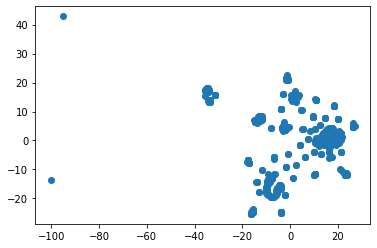

In [20]:
# visualize results
viz_df = pd.DataFrame()
viz_df['x'] = tsne_features[:,0]
viz_df['y'] = tsne_features[:,1]
plt.scatter(viz_df['x'], viz_df['y'])
plt.show()

c:\Users\steph\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


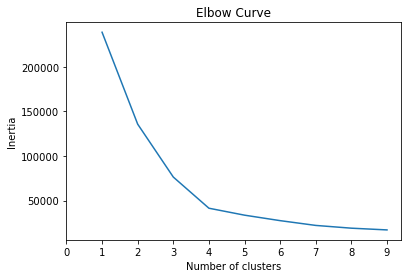

In [28]:
# conduct kmeans analysis
inertia = []
k = list(range(1, 10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(viz_df)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(10)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [31]:
# Initialize the k-means model
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(viz_df)

# Predict clusters
predictions = model.predict(viz_df)

# Add the predicted class column to the dataframe
viz_df["predictions"] = model.labels_
viz_df.head()

,x,y,predictions
0,-8.105387,-12.292918,0
1,-5.859520,-18.699142,0
2,-15.398599,-23.753670,0
3,-35.503738,17.257751,2
4,18.305897,12.032002,1


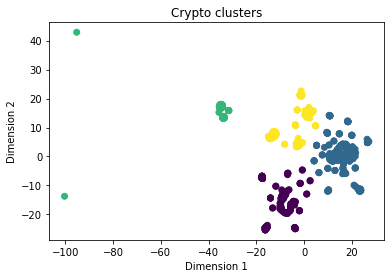

In [32]:
plt.scatter(x=viz_df['x'], y=viz_df['y'], c=viz_df['predictions'])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Crypto clusters')
plt.show()

# Recommendation

Most crypto currencies can be clustered and have predictable results but due to the diversity and virulence of the market, there is significant variance and outliers. Investors are advised to proceed with caution and acquit a cryptocurrency throughly before buying assets.